# Photon count measurement for Gaussian States

Gaussian state is usually a quadrature component $\hat{x}, \hat{p}$. Since it is described by a multivariable Gaussian distribution with a variable, it seems more natural to perform a homodyne measurement to know the state.
It is also implemented as MeasureX, MeasureP in photonqat.

The reasons why wouold you want to measure the number of photons for Gaussian state are as follows.

One is a scheme called Gaussian Boson Sampling.
When a photon count is measured for a Gaussian state, the probability that a certain photon count will be obtained as a measurement result is calculated by a function called Hafnian.
Hafnian is expected to accelerate the calculation by Gaussian Boson Sampling because the amount of calculation increases exponentially with the existing algorithm.
Hafnian seems to be closely related to the calculation of Perfect Matching in graph theory.

The other is a combination of Gaussian manipulation and photon counting as one of the proposed schemes for universal photon computation.
This is related to the recent news of Universal Quantum Computing using the entangled state of Furusawa Lab.

Gaussian Boson Sampling has been researched by Xanadu of Canada in recent years and has published several related papers and a library called the Walrus (https://the-walrus.readthedocs.io/en/latest/index.html).

The implementation of photon counting for Gaussian state in photonqat also follows the ideas and formulas they have published in their paper (arXiv: 1905.07011 [quant-ph]).

In [1]:
from blueqat import photonqat as pq

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special

## Photonqat

After performing the basic gate operation and photon count measurement, the probability that the photon count in 2 modes is (0, 0) is calculated.

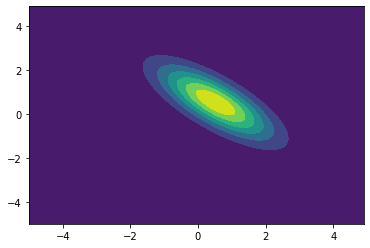

mu0 = [0.5202601 0.5202601]
cov = [[ 1.19054892 -0.9067151 ]
 [-0.9067151   1.19054892]]
Probability of photon number [0 0] :  0.5695892908718674


In [3]:
G = pq.Gaussian(2) # two qumode [0, 1]
G.D(0, 2) # Displacement gate
G.S(0, 1) # X squeeIng gate, r=1
G.R(0, np.pi/4) # pi/4 rotation gate
G.BS(0, 1, np.pi/4) # 50:50 beam splitter
G.run()
G.Wigner(0) # plot
print('mu0 =', G.mean(0)) # mu of qumode 0
print('cov =', G.cov(0)) # covarince of qumode 1

m = np.array([0, 0]) # measured output of photon number for each mode
prob = G.PhotonDetectionProb(m, m) # probability
print("Probability of photon number", m, ": ", prob)